In [14]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import os
import glob as glob

# Read in Raw Data

In [15]:
# This function reads the most recent dataset and cuts this based on the date range provided 

def cut_raw_data(start_date, end_date):
    
    # Set base path
    base_path = r'C:\Users\mball3\OneDrive - KPMG\Documents\Investment_Analysis\data'

    # This returns all folders in the base_path
    # return the folder, in the base path, if it is a folder
    # And only return folders of length 10 containins two underscores 
    folders = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))
               and len(folder) == 10 and folder.count('_') == 2
              ]

    # Find latest folder in the path
    latest_folder = max(folders, key=lambda x: datetime.strptime(x,'%d_%m_%Y'))

    # Create new full path to the most recent folder
    latest_path = os.path.join(base_path, latest_folder)

    # Retrieve the file names
    filenames = glob.glob(latest_path+"/*.csv")

    # Combine data for all stocks
    all_data = []
    for filename in filenames:

        # Read in the historical data for each stock 
        historical_data = pd.read_csv(filename)
        Stock = filename.split("\\")[-1].split('.')[0]

        # Convert date to date format - english 
        historical_data['Stock'] = Stock
        historical_data['Date'] = pd.to_datetime(historical_data['Date'])

        historical_data.sort_values(by=['Date'], inplace=True)

        # Store the data
        all_data.append(historical_data)

    # Concatenate the data    
    df = pd.concat(all_data, ignore_index=True)

    # Convert date to date format 
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by=['Date'], inplace=True)
    
    # Cut by dates
    df = df[(df['Date'] > start_date) & (df['Date'] < end_date) ]

    # Set the date as the index
    df = df.set_index('Date')

    # make certain columns numeric 
    cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

    # Confirm column names
    df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Stock']
    
    return df


In [16]:
# This is the date range I had initally analysed
# It was just over a year's worth of data from the first data i began my analysis
df = cut_raw_data(start_date='2022-12-18', end_date='2024-01-15')
df

,Open,High,Low,Close,Adj Close,Volume,Stock
Date,,,,,,,
2022-12-19,86.000000,86.620003,85.430000,86.419998,83.206001,5834800,GILD
2022-12-19,30.105000,30.600000,30.084999,30.155001,30.155001,3678400,CPRT
2022-12-19,442.329987,442.850006,432.100006,438.690002,433.406830,1064500,LRCX
2022-12-19,135.110001,135.199997,131.320007,132.369995,131.634216,79592600,AAPL
2022-12-19,41.250000,41.299999,40.500000,40.560001,38.236305,2545800,TCEHY
...,...,...,...,...,...,...,...
2024-01-12,85.879997,86.449997,85.639999,86.379997,86.379997,5883900,GILD
2024-01-12,144.339996,144.740005,143.360001,144.240005,144.240005,13995200,GOOG
2024-01-12,760.729980,763.349976,754.859985,759.669983,759.669983,497200,LRCX


In [17]:
# Now convert the one large dataframe into seperate dfs for each stock
stocks = df['Stock'].unique()

for stock in stocks:
    globals()[f"{stock}"] = df[df['Stock'] == stock].drop('Stock',axis=1)


In [18]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-19,135.110001,135.199997,131.320007,132.369995,131.634216,79592600
2022-12-20,131.389999,133.250000,129.889999,132.300003,131.564621,77432800
2022-12-21,132.979996,136.809998,132.750000,135.449997,134.697113,85928000
2022-12-22,134.350006,134.559998,130.300003,132.229996,131.494995,77852100
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
...,...,...,...,...,...,...
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500
2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900


In [19]:
# Inspect one stocks data 
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,268.000000,268.000000,268.000000,268.000000,268.000000,2.680000e+02
mean,171.286717,172.875373,169.979291,171.561381,171.137760,5.973733e+07
std,18.633548,18.404188,18.688331,18.501043,18.684076,1.767184e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,159.352497,161.425003,157.864998,159.895004,159.249016,4.808845e+07
50%,175.244996,177.025002,173.840004,175.475006,175.244132,5.586760e+07
75%,185.932499,187.425003,184.305004,186.054997,185.985737,6.667920e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


Description of each variable:

Open - opening price that day

High - highest value that day

Low - lowest price that day

Close - close price that day

Adj Close - close price adjusted for splits and dividend distributions 

Volume - number of trades made that day


What is notable from the above description data
- the close price on average is marginally higher than the open price
- the close price also has a slightly smaller standard deviation, 
  meaning there is less veriance in the price of this stock at close
      - but the open price is just the previous days close price, so perhaps this is meaningless 
  
- the median < mean for volume, meaning there is a positive skew for the volume of trades
    - this means that the volume of transactions of AAPL are more often less than the mean number
    - there are more days of lower trade volume than the mean
    
- the variance of the high price is lower than of the low price, 
    - meaning the price fluctuations of spikes are slightly lower than of a dips


In [20]:
# Have a look at the info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2022-12-19 to 2024-01-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       268 non-null    float64
 1   High       268 non-null    float64
 2   Low        268 non-null    float64
 3   Close      268 non-null    float64
 4   Adj Close  268 non-null    float64
 5   Volume     268 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.7 KB


# 1. Data Visualisation 

<style>
    .my-custom-font {
        font-size: 16px;
    }
</style>

<span class="my-custom-font">
    
    
First I will visualise the closing price of stocks. 
    
The adjusted stock price is regarded as the best indicator of a stock's value

</span>


In [21]:
def line_plot(data, column, col_name):
    
    # Set Style 
    sns.set(style="whitegrid")

    # Create subplots
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(top=1.25, bottom=1.2)

    # Vis for each stock
    stocks = sorted(data['Stock'].unique())

    for i, stock in enumerate(stocks, 1):
        subset = data[data['Stock'] == stock]
        plt.subplot(6,2, i)
        sns.lineplot(x=subset.index, y=subset[column], data=subset)
        plt.title(f'{stock}', fontsize=10)
        plt.xlabel(None)
        plt.xticks(fontsize=10)
        plt.ylabel(col_name, fontsize=10)
        plt.yticks(fontsize=10)

    #plt.subplots_adjust(hspace=100)

    plt.tight_layout()
    plt.show()

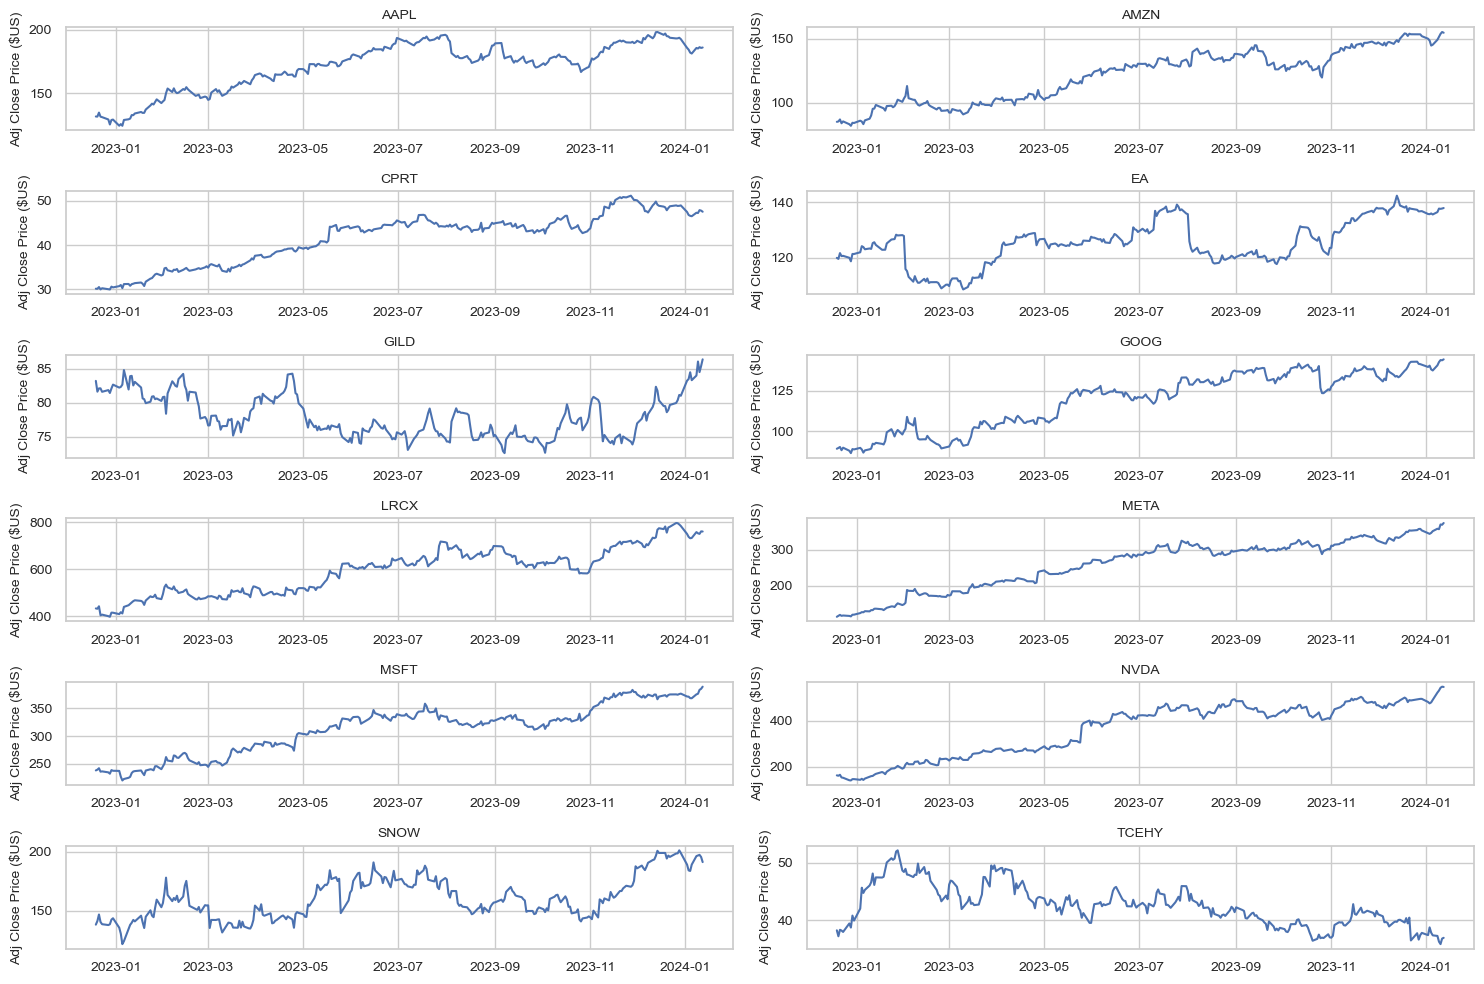

In [23]:
line_plot(df, 'Adj Close', 'Adj Close Price ($US)')

- TCEHY has had a fairy steady fall in value over the period
- META, LRCX, CPRT, AAPL & AMZN have shown increasing valuations 
- What I find most interesting, is the lack in volatility of META's price rise, this apprears to be steady growth
- Whereas SNOW for example shows high volatility - this may make predicing this stocks price changes more difficult
- But I anticipate that there could be overfitting when predicting META's stock price

Below I have visualised the volume of trades, that is the number of times this stock is traded on a daily basis

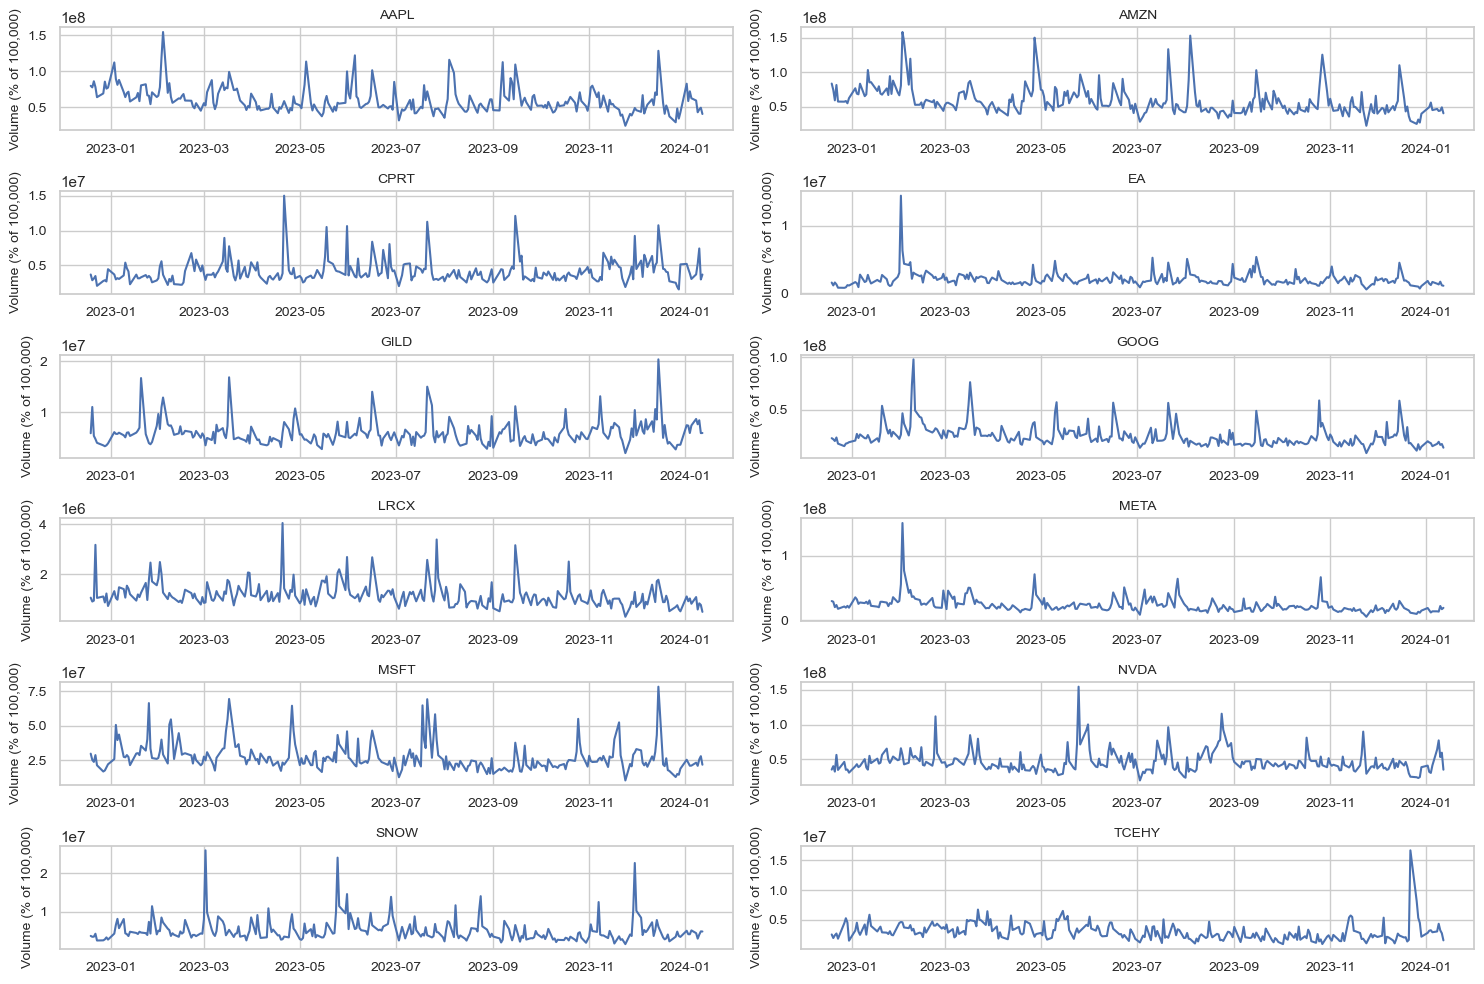

In [24]:
line_plot(df, 'Volume', 'Volume (% of 100,000)')

- AAPL and AMZN show the most obvious decline in volume of trades
- TCEHY has had an interesting spike around Q4 2023

# 3. Look at the Cost Basis - Profitability

I intend on making a profit from my analysis, therefore it will be worth visualising the daily profit from each stock

One way is to calculate the profit or loss on a daily basis.

I do this by calculating the cost basis, which measures the percentage change in the stock price from one day to the next

In [25]:
def create_daily_return(data):
    
    stocks = sorted(data['Stock'].unique())

    df_update = []

    for stock in stocks:
        temp = data[data['Stock']==stock]
        temp = temp.sort_index()
        temp['Daily Return'] = temp['Adj Close'].pct_change()
        df_update.append(temp)

    df2=pd.concat(df_update)

    cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

    df2[cols_to_convert] = df2[cols_to_convert].apply(pd.to_numeric, errors='coerce')
    
    return df2


In [29]:
df2 = create_daily_return(df)

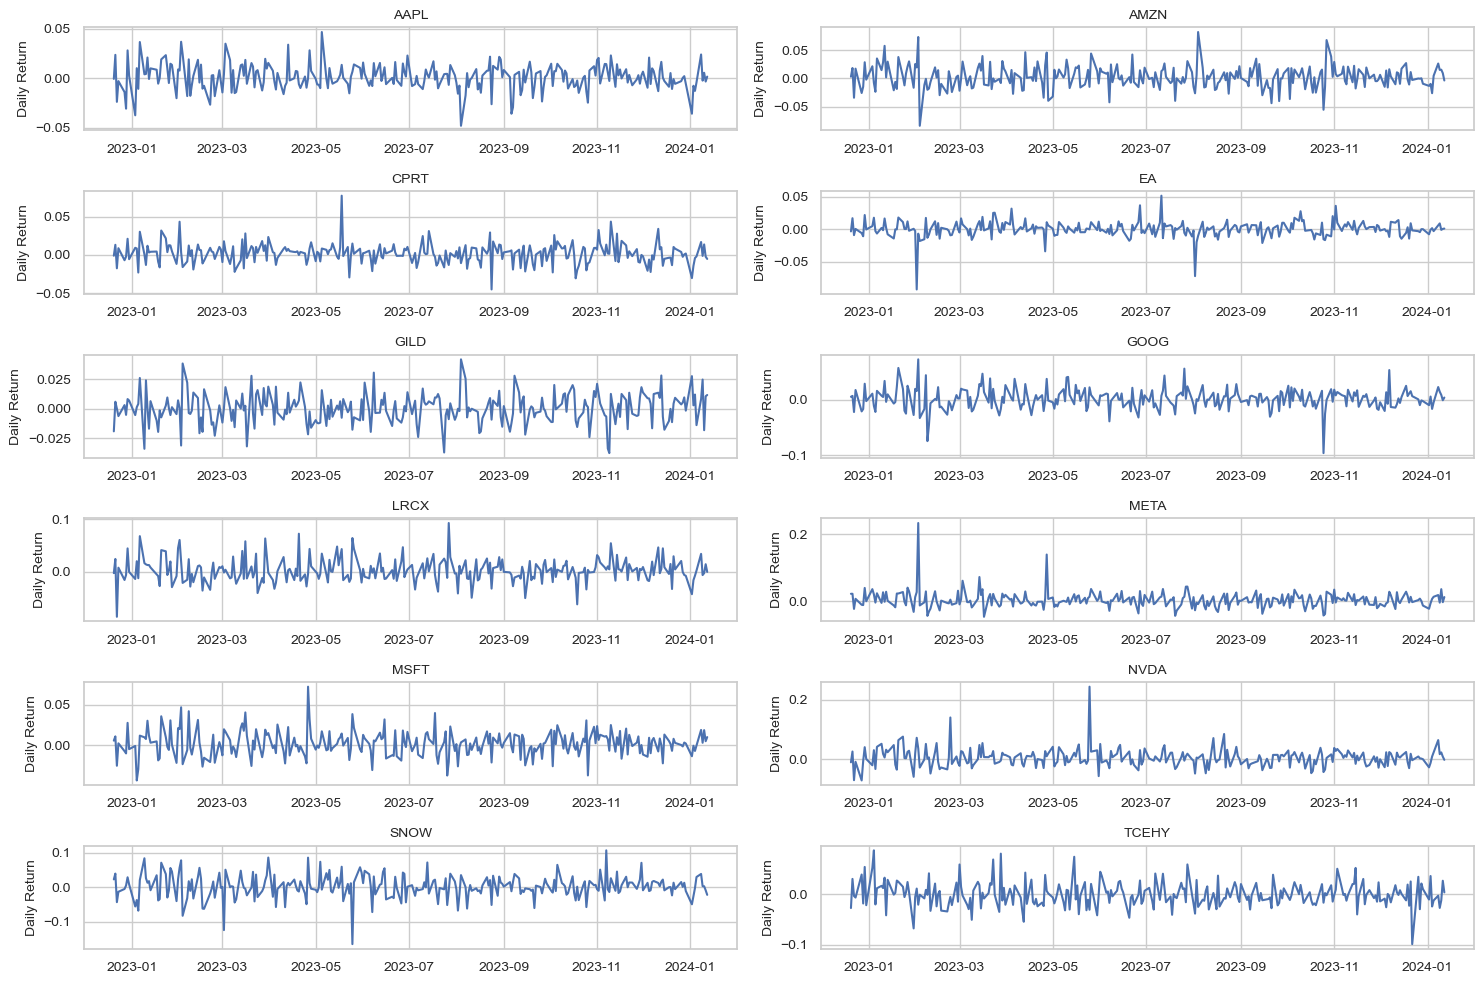

In [30]:
line_plot(df2, 'Daily Return', 'Daily Return')

- where values are greater than 0, the stock is making a profit for that day
- clearly profitability is extremely volatile, thus highlighting my theory that me being able to profit from this excercise is unlikely
- META shows a good example of where a shock has massively altered the price of a stock from one day to the next

Lets not look at the spread of profitability for each stock

In [31]:
def hisogram_plot(data, column, bins):
    
    # Set Style 
    sns.set(style="whitegrid")

    # Create subplots
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(top=1.25, bottom=1.2)

    # Vis for each stock
    stocks = sorted(data['Stock'].unique())

    for i, stock in enumerate(stocks, 1):
        subset = data[data['Stock'] == stock]
        subset = subset[~subset[column].isna()]
        plt.subplot(6,2, i)
        sns.histplot(data=subset, x=column, bins=bins)
        plt.title(f'{stock}', fontsize=10)
        plt.xlabel(column, fontsize=10)
        plt.xticks(fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.yticks(fontsize=10)

    #plt.subplots_adjust(hspace=100)

    plt.tight_layout()
    plt.show()


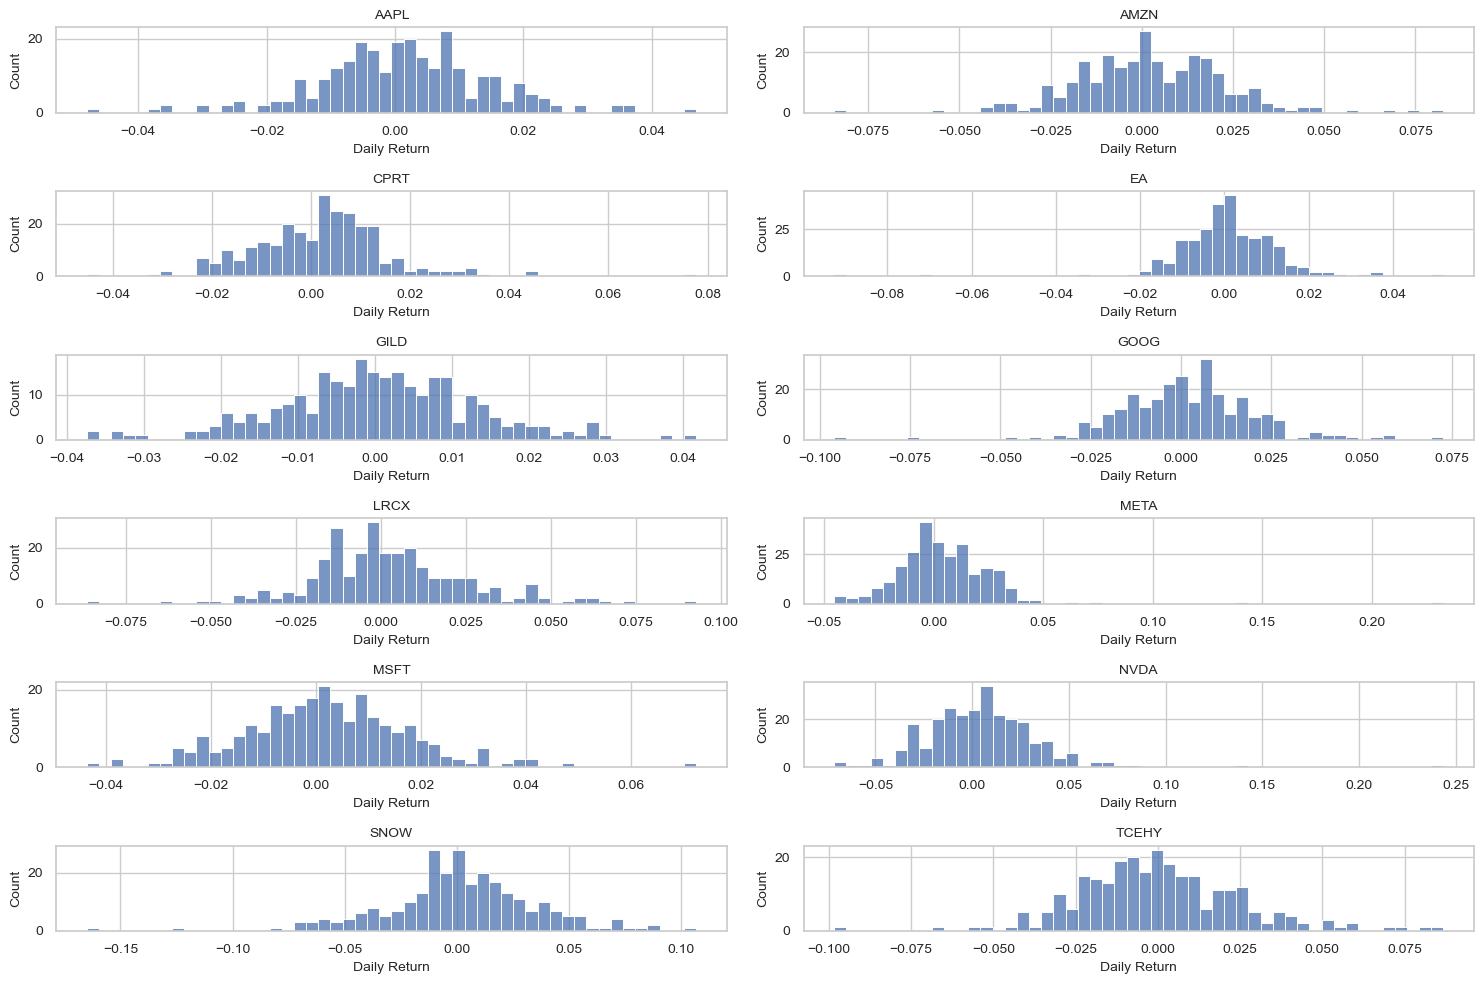

In [32]:
hisogram_plot(df2, 'Daily Return', 50)

- the spread of profitability for GILD is interesting, it has a very even distribution
- as does LRCX
- CPRT has very few days of high return 
- EA appears to have the lowest variance around the mean
- most stocks appear to have a fairly even spread, with a mean around zero
- this would suggest that it is likely to be difficult to make profit from trading these stocks as on average they will make no return from one day to the next

# 4. Moving Averages

- I want to better understand the trend of prices 
- To do this, I will create moving averages for each stock
- This smooths out the trends and may make it easier for me to see more general price changes for these stocks

In [33]:
# I ignore the warnings here, because they are just warning me that I am creating new columns on a copy of the original data
# I am aware of this
import warnings
warnings.filterwarnings('ignore')

# I will begin by working out the moving averages for the original data
ma = [10, 20, 30, 50, 200]
stocks = sorted(df2['Stock'].unique())

df_update = []

for stock in stocks:
    temp = df2[df2['Stock']==stock]
    for m in ma:
        temp[f'ac_ma_{m}'] = temp['Adj Close'].rolling(m).mean()
    df_update.append(temp)

# Join data together
df3 = pd.concat(df_update)

# Remove column names that are in rows, due to concatenation
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 
                   'Volume', 'Daily Return', 'ac_ma_10', 
                   'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']

df3[cols_to_convert] = df3[cols_to_convert].apply(pd.to_numeric, errors='coerce')

df3 = df3[['Stock', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
          'Daily Return', 'ac_ma_10', 
           'ac_ma_20', 'ac_ma_30', 'ac_ma_50', 'ac_ma_200']]
df3 = df3.sort_index()    


print(f"This should return True, :{len(df3) == len(df2) == len(df)}")


This should return True, :True


In [34]:
# Check for duplicates, this should be empty 
duplicate_rows = df3[df3.duplicated()]

duplicate_rows

,Stock,Open,High,Low,Close,Adj Close,Volume,Daily Return,ac_ma_10,ac_ma_20,ac_ma_30,ac_ma_50,ac_ma_200
Date,,,,,,,,,,,,,


In [35]:
# Now convert the one large dataframe into seperate dfs for each stock
stocks = sorted(df3['Stock'].unique())

for stock in stocks:
    globals()[f"{stock}"] = df3[df3['Stock'] == stock].drop('Stock',axis=1)

In [36]:
AAPL.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Daily Return,ac_ma_10,ac_ma_20,ac_ma_30,ac_ma_50,ac_ma_200
Date,,,,,,,,,,,,
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,0.005671,186.912999,191.323501,191.525334,188.369413,180.076908
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400,-0.003223,186.156999,190.867500,191.365000,188.679894,180.216655
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,0.001778,185.390999,190.265500,191.250000,188.987388,180.361190


(array([34., 36., 38., 40., 42., 44., 46., 48., 50., 52., 54.]),
 [Text(0, 34.0, '34'),
  Text(0, 36.0, '36'),
  Text(0, 38.0, '38'),
  Text(0, 40.0, '40'),
  Text(0, 42.0, '42'),
  Text(0, 44.0, '44'),
  Text(0, 46.0, '46'),
  Text(0, 48.0, '48'),
  Text(0, 50.0, '50'),
  Text(0, 52.0, '52'),
  Text(0, 54.0, '54')])

<Figure size 2000x2000 with 0 Axes>

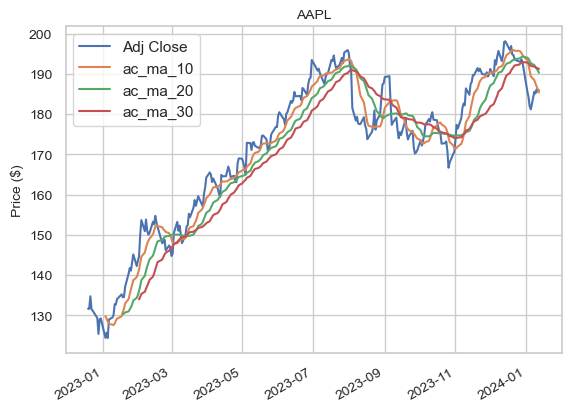

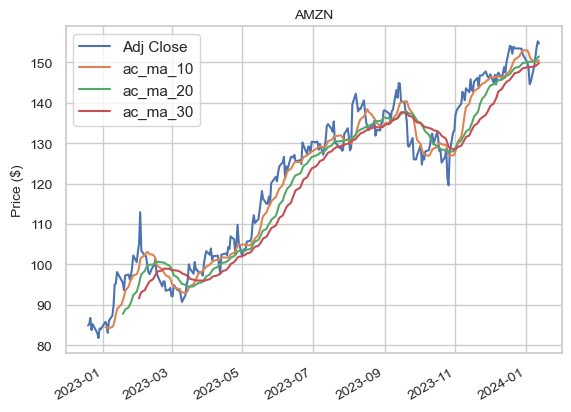

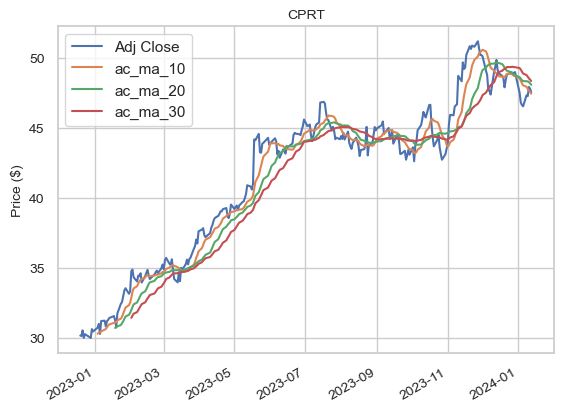

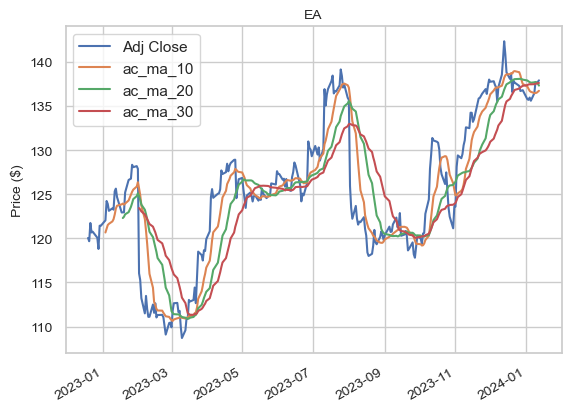

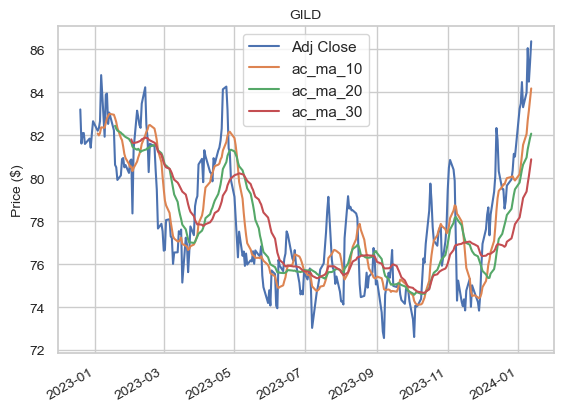

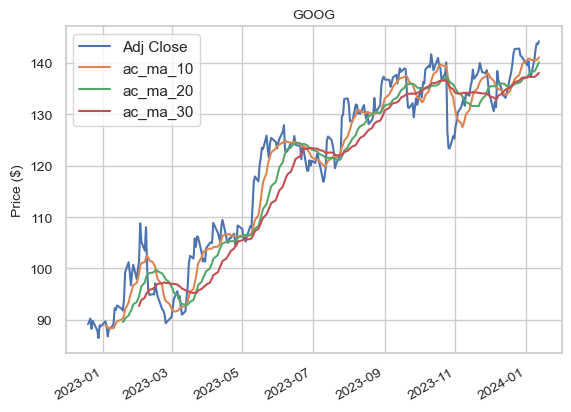

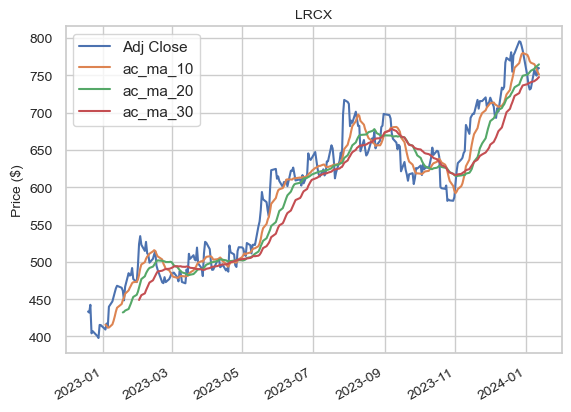

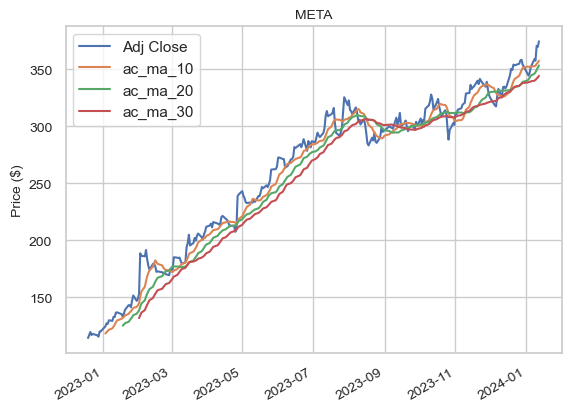

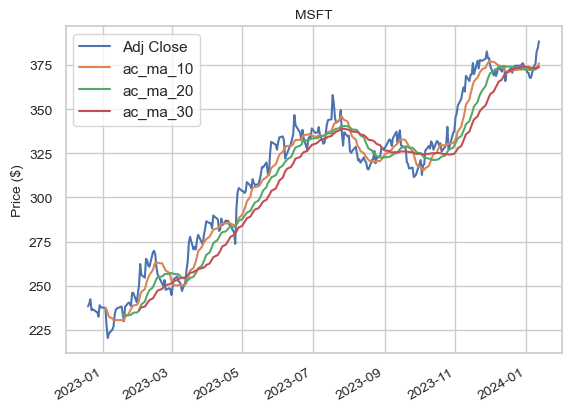

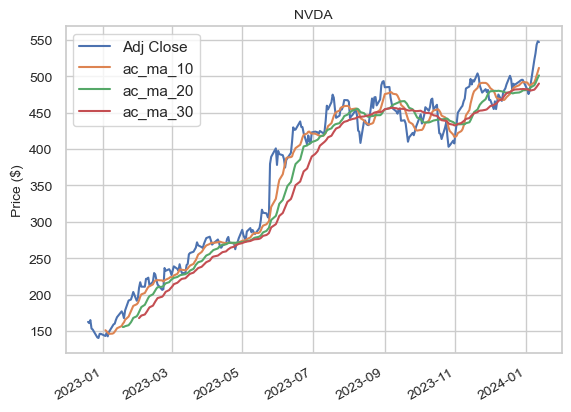

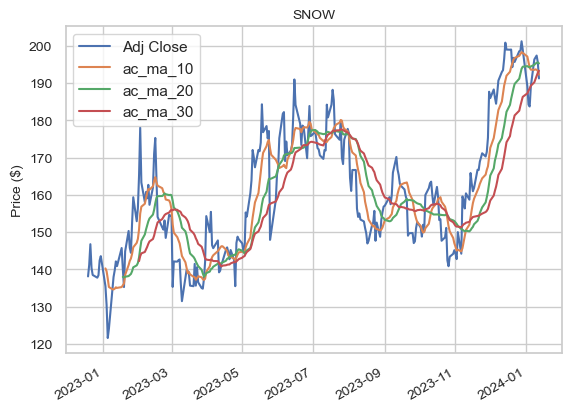

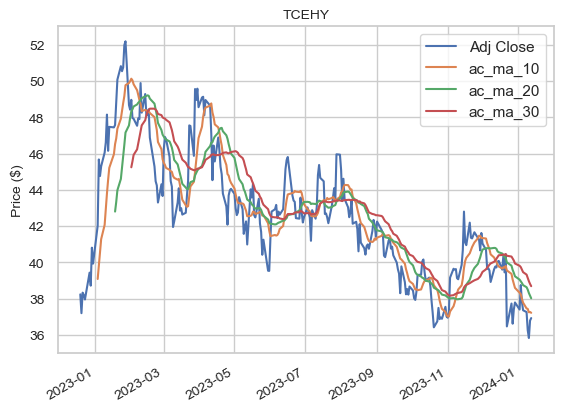

In [37]:
# I have not plotted them as subplots in order to make them easier to visualise

# Set Style 
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(20, 20))

AAPL[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('AAPL', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)


AMZN[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('AMZN', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

CPRT[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('CPRT', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

EA[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('EA', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

GILD[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('GILD', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

GOOG[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('GOOG', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

LRCX[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('LRCX', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

META[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('META', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

MSFT[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('MSFT', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

NVDA[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('NVDA', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

SNOW[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('SNOW', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

TCEHY[['Adj Close', 'ac_ma_10', 'ac_ma_20', 'ac_ma_30']].plot()
plt.title('TCEHY', fontsize=10)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.ylabel('Price ($)', fontsize=10)
plt.yticks(fontsize=10)

- The moving averages are a useful way to understand the trend of each stock
- The larger the moving average, the smoother the chart
- So using 10/20 days may be best, as they capture variation without much noise
- The 30 day moving average is potentially too smooth
- Though when the data set gets much larger, using a 50 day and a 200 day smoothed average are effective methods for checking if the market has entered a bear/bull market
    - this is done by flagging when the price of a stock passes these long term trend lines

# 5. Correlations

- I will now look at the correlations between the stock's daily returns 
- This is to understand whether stocks in the same industry behave in a similar fashion 
- If we see that this is the case, I may be able to use price changes to one stock as indicators for future price changes in another stock


In [56]:
def correlation_plots(column_name):
    
    # TAKE THE FAILY RETURN FROM INDIVINDUAL DATAFRAMES
    # COMBINE INTO ONE DATASET
    stocks = sorted(df3['Stock'].unique())
    stocks_df = [AAPL, AMZN, CPRT, EA, GILD, GOOG, LRCX, META, MSFT, NVDA, SNOW, TCEHY]

    data_store = pd.DataFrame()
    for stock, s_df in zip(stocks, stocks_df):
        temp_store = pd.Series(s_df[column_name], name=f'{stock}')
        data_store = pd.concat([data_store, temp_store], axis=1)

    # Make a copy  
    df = data_store
    
    # PLOT A CORRELATION HEATMAP
    correlation_matrix = df.corr()

    # Create a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title(f'{column_name} Correlation Matrix Heatmap')
    plt.show()
    
    # CREATE PAIRPLOT
    big_5_dr = df[['AAPL', 'AMZN', 'GOOG', 'META','MSFT']]
    
    daily_return = sns.pairplot(big_5_dr)
    daily_return.map_lower(sns.kdeplot, levels=4, color=".2")
    plt.suptitle(f"Pairplot of {column_name}", y=1.02)
    
    return df


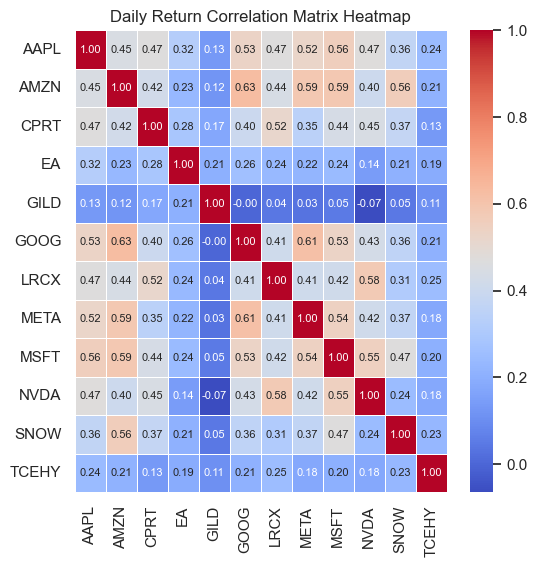

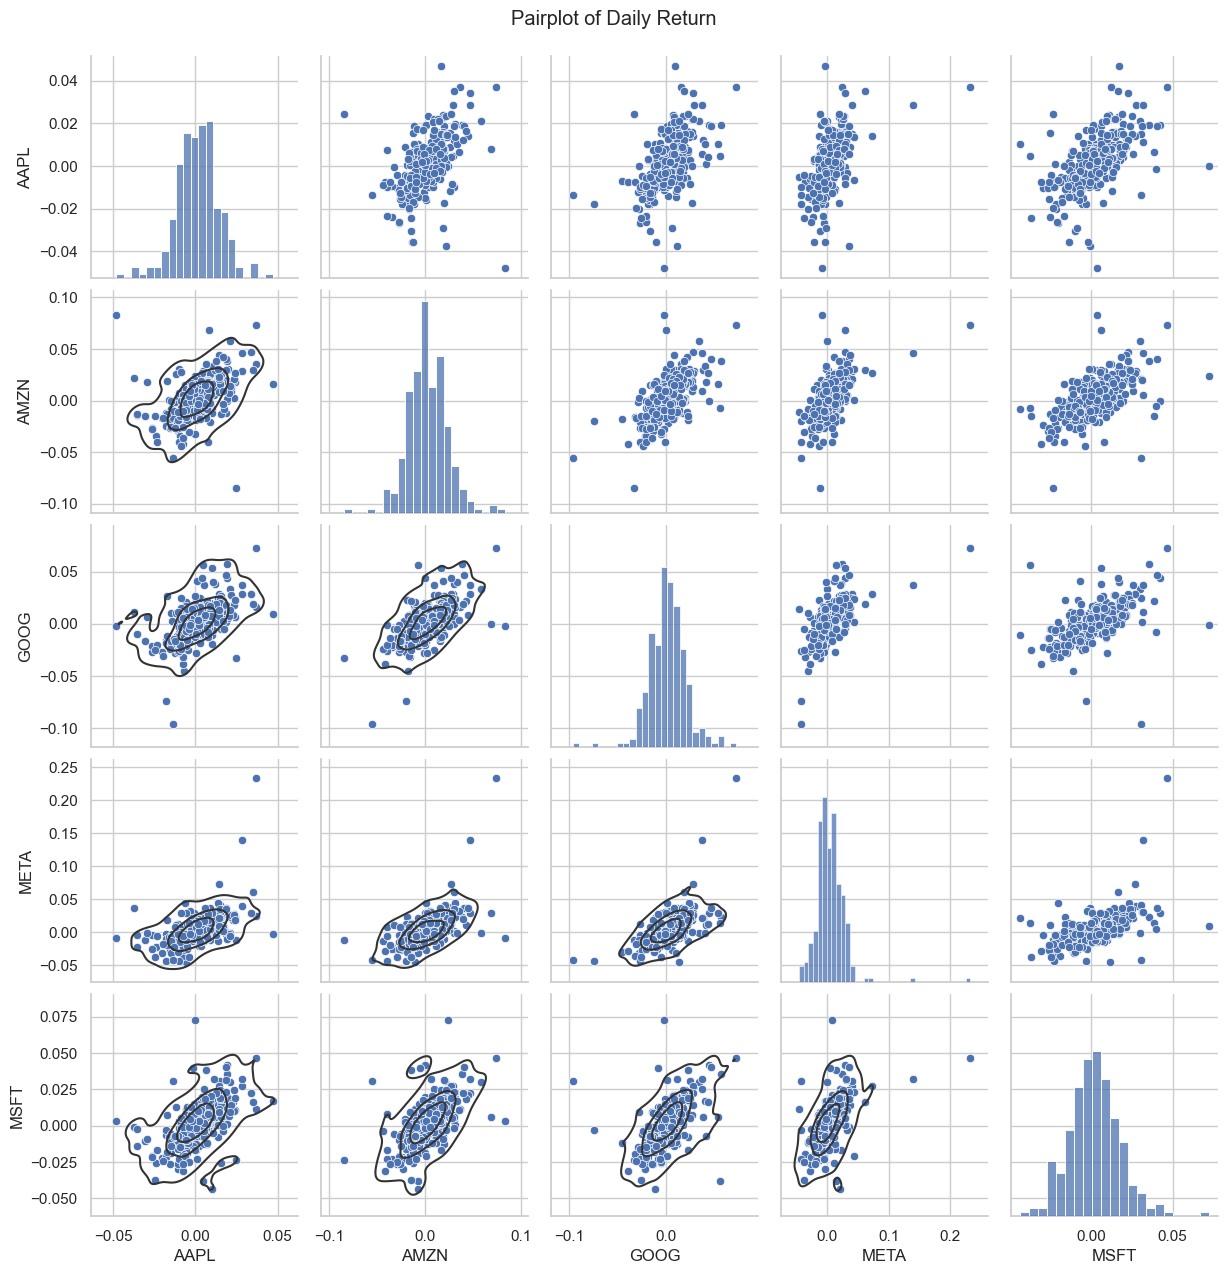

In [57]:
dr_df = correlation_plots('Daily Return')

As of 15/01/2024:
- the strongest correlation is between GOOG & AMZN - two massive tech companies, so this makes logical sense
- then GOOG & META 
- then META & AZN and MSFT & AMZN
- my assumption is that because these 5 massive tech companies are so much larger than the rest of the stocks I am looking at, they are most similar to eachother 
    - and so shocks to the market affect them in similar ways
    - or perhaps a fall in the value of one of these stocks, may impact the value of the others
    
    
I then investigate the correlations between the top 5 tech companies in more detail:
- we already know from the heatmap that the correlations between the big 5 tech companies are all positive
- we also know which are strongest
- but this is a useful way of visualising the relationships


- the Kernel density plot has been useful for showing the three most dense areas in this distribution


I'm going to repeat this process for the adjusted closing price too

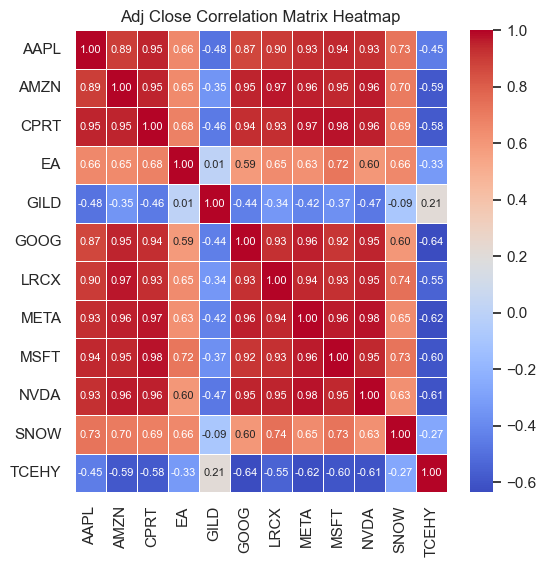

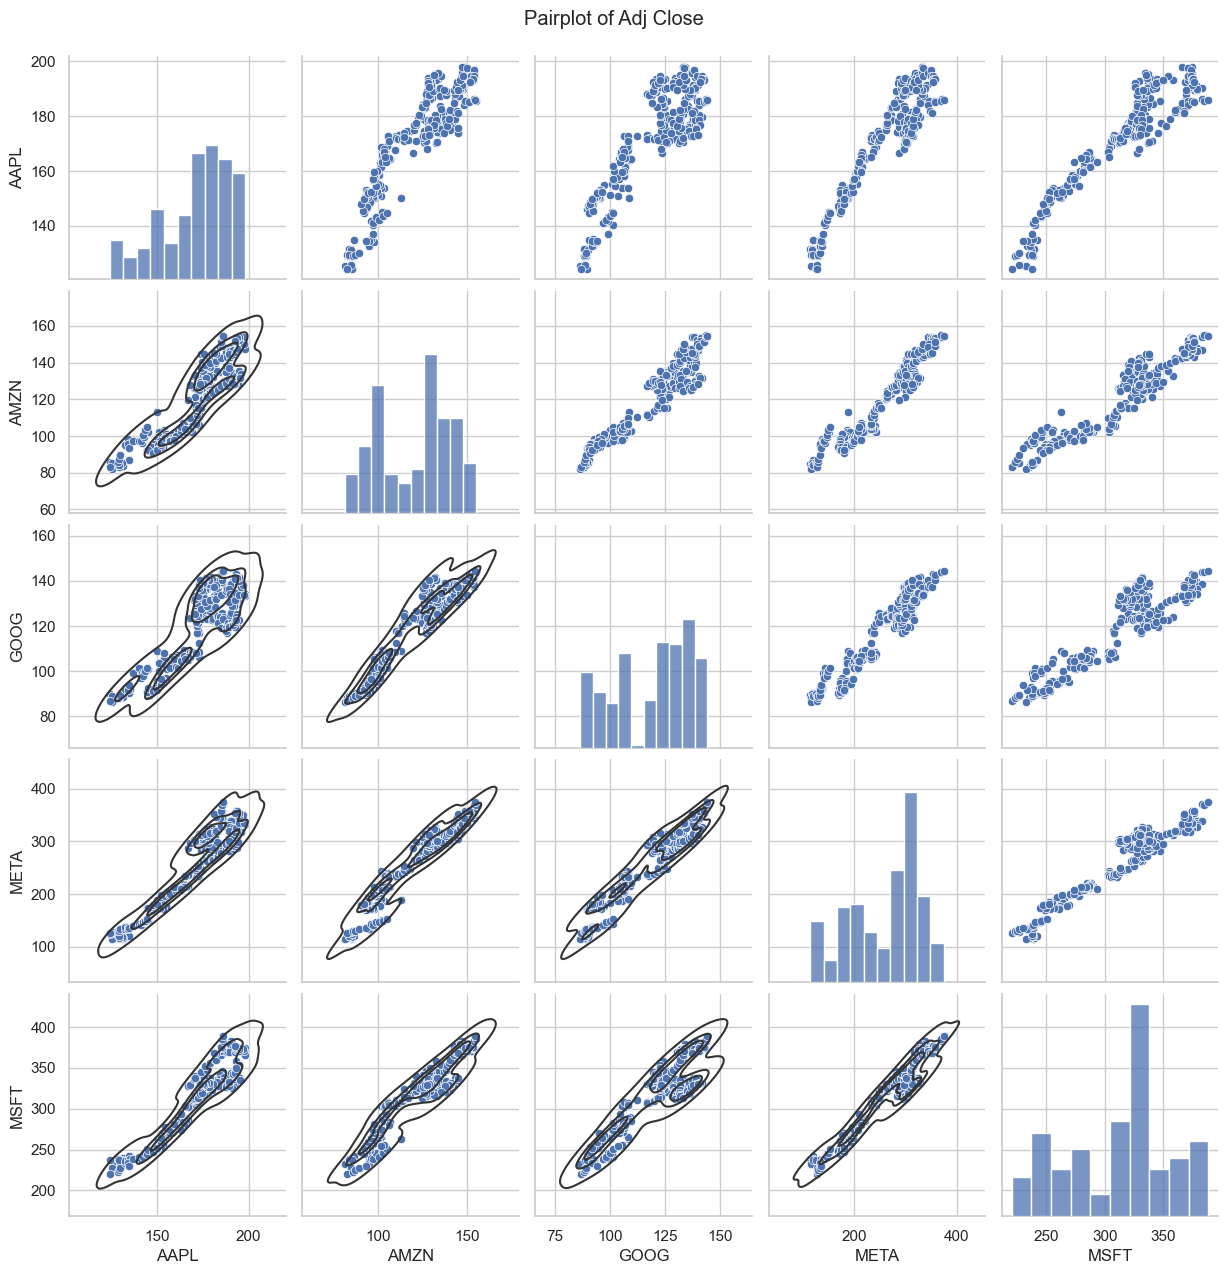

In [58]:
ac_df = correlation_plots('Adj Close')

- From this we can see that the correlations between the adjusted closing prices of these stocks are far stronger than they are for the daily return 
- this suggests that closing price changes for the big 5 tech companies are much more aligned than the daily returns are
- the daily returns are likely to be less well correlated because they refer to a percentage change from one point to another, which involves two prices, instead of just one

# 6. Risk vs. Reward

I've seen an example online where someone used the mean and standard deviation of a stock price  to represent the reward and risk of each stock
- I believe that the mean of the daily return is used to represent the expected return from a stock
    - it is the average % profit earnt on a stock 
    
- The standard deviation was used as a measure of risk
    - this is because the standard deviation measures the variability of a stock
    - a large standard deviation means there is lots of variance about the mean of a stocks daily return 

In [59]:
# Find the mean and standard deviation for each stock
col_df = []
mean_df = []
std_df = []
for col in dr_df.columns:
    mean = dr_df[col].mean()
    std = dr_df[col].std()
    
    col_df.append(col)
    mean_df.append(mean)
    std_df.append(std)
    
er_risk = {'stock':col_df, 'mean':mean_df, 'std':std_df}
er_risk = pd.DataFrame(er_risk)
er_risk

,stock,mean,std
0,AAPL,0.001380,0.013171
1,AMZN,0.002459,0.020665
2,CPRT,0.001800,0.013555
3,EA,0.000601,0.012680
4,GILD,0.000221,0.012771
5,GOOG,0.001984,0.018993
6,LRCX,0.002365,0.022985
7,META,0.004736,0.024719
8,MSFT,0.001952,0.015618
9,NVDA,0.005009,0.030735


Text(0, 0.5, 'Risk')

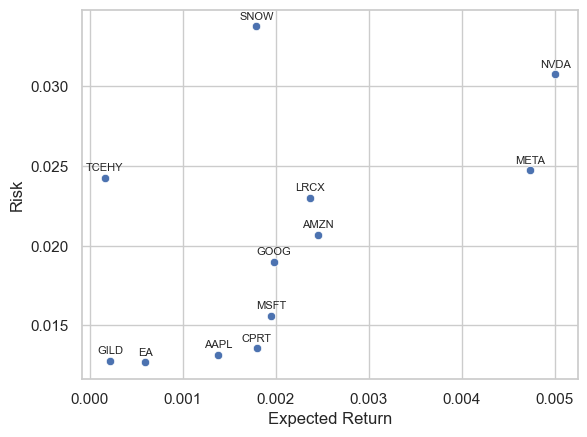

In [60]:
# plot the expected return against the risk of each stock
sns.scatterplot(data=er_risk, x='mean', y='std')

for index, row in er_risk.iterrows():
    plt.annotate(row['stock'], 
                 (row['mean'], row['std']), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center',
                 fontsize=8)
    
plt.xlabel('Expected Return')
plt.ylabel('Risk')

- unbelieveably the expected return from each stock is positive, meaning that on average the price of each stock is higher than the day before on average
- based on this, we should place money on every stock and will make profit on average



- given that the expected return from this period is highest for NVDA, I am going to try and predict it's stock price going forward
- this is the next step on the analysis

# 7. Modelling

- I have seen that the LSTM model is a really useful model for timeseries forecasting 
- I am going to test this model first and may try some different types too
- My analysis for far has informed me that I will be predicting the price of the NVDA stock
- I will be predicting the Close price, not the Adjusted price, as I cannot account for tax/dividends fees etc

*Getting the raw data*

In [92]:
df = cut_raw_data(start_date='2022-12-31', end_date='2024-01-15')

stocks = df['Stock'].unique()

for stock in stocks:
    globals()[f"{stock}"] = df[df['Stock'] == stock].drop('Stock',axis=1)

    
NVDA.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-10,536.159973,546.000000,534.890015,543.500000,543.500000,53379600
2024-01-11,549.989990,553.460022,535.599976,548.219971,548.219971,59675900
2024-01-12,546.200012,549.700012,543.299988,547.099976,547.099976,35247900


In [122]:
# This function looks at the close price on a given date
# If the window is say 3
# It then finds the close price three days prior to this date
# So Target-1 is yesterdays close price
# This turns this into a supervised learning problem, where Target is the target variable
# And the other n variables are the input data
# This is to get the dataset required for the LSTM model

def create_window_df(data, window):
    # Create temp data between date range specified
    temp = data.loc[data.index[0]:data.index[-1]]
    
    df_window = []
    
    for i in range(len(temp)):
        row = temp[i-window:i+1]
        
        if len(row) != (window+1):
            continue
            
        else:
            date = row.index[-1]
            column_names = [f'Target-{j}' for j in range(window, 0, -1)]
            column_names.append('Target')
            
            df_dict = dict(zip(column_names, row))
            df_dict.update({'Date':date})
            
            df_window.append(df_dict)
    
    df_window = pd.DataFrame(df_window)
    df_window = df_window.set_index('Date')
    
    return df_window

In [123]:
GOOG

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
...,...,...,...,...,...,...
2024-01-08,138.000000,140.639999,137.880005,140.529999,140.529999,17645300
2024-01-09,140.059998,142.800003,139.789993,142.559998,142.559998,19579700
2024-01-10,142.520004,144.524994,142.460007,143.800003,143.800003,16641900


In [148]:
data_set = NVDA
df_windowed = create_window_df(data_set['Close'], window=3)
df_windowed

,Target-3,Target-2,Target-1,Target
Date,,,,
2023-01-06,143.149994,147.490005,142.649994,148.589996
2023-01-09,147.490005,142.649994,148.589996,156.279999
2023-01-10,142.649994,148.589996,156.279999,159.089996
2023-01-11,148.589996,156.279999,159.089996,160.009995
2023-01-12,156.279999,159.089996,160.009995,165.110001
...,...,...,...,...
2024-01-08,475.690002,479.980011,490.970001,522.530029
2024-01-09,479.980011,490.970001,522.530029,531.400024
2024-01-10,490.970001,522.530029,531.400024,543.500000


In [149]:
# Turn this data into a numpy dataset, for the model

def windowed_to_numpy(data):
    
    data = data.reset_index()
    data_as_np = data.to_numpy()
    
    # Get just the dates
    dates = data_as_np[:, 0]

    # Find the x data, then need to get the data in one entry 
    # This seems to be the desired shape for the model
    middle_matrix = data_as_np[:, 1:4]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    # Get the target data
    Y = data_as_np[:, 4]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)


In [150]:
dates, X, Y = windowed_to_numpy(nvda_windowed)

dates.shape, X.shape, Y.shape

((256,), (256, 3, 1), (256,))

*Train, Validation, Test split*

- I want to create a training, evaluation and a test dataset
- so rather than creating that with the train_test_split function, im going to create it manually

Text(0, 0.5, 'Close Price ($)')

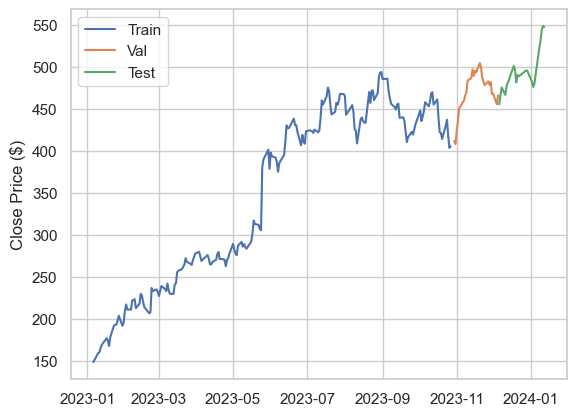

In [151]:
q_80 = int(len(dates) *.8)
q_90 = int(len(dates) *.9)

#Train
dates_train, X_train, Y_train = dates[:q_80], X[:q_80], Y[:q_80]

#Eval
dates_val, X_val, Y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]

#Test
dates_test, X_test, Y_test = dates[q_90:], X[q_90:], Y[q_90:]

# Plot
plt.plot(dates_train, Y_train)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, Y_test)
plt.legend(['Train', 'Val', 'Test'])
plt.ylabel('Close Price ($)')

In [152]:
print(max(dates_train))

print(min(dates_val))


2023-10-27 00:00:00
2023-10-30 00:00:00


*Building the model*

In [153]:
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.optimizers import Adam #optimiser
from tensorflow.keras import layers # model will have multiple layers

# Build

model = Sequential([layers.Input((3,1)), # there are three layers to out input data, because the window has three layers
                   layers.LSTM(64), # number of nuerons in the neural network - this is a good level to prevent overfitting 
                   layers.Dense(32, activation='relu'), # this creates another layer in the NN
                   layers.Dense(32, activation='relu'), # do another
                   layers.Dense(1) # final layer
                   ])

model.compile(loss='mse', # loss means we are trying to minimise the mean squared error
              optimizer=Adam(learning_rate=0.001), # try this learning rate
              metrics = ['mean_absolute_error'] # this allows us to see on average how off the model is
                                                # it makes more sense to interpret this, even if minimising the mean squared error
             )


model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100 ) # runs for 100 times on the training data

Epoch 1/100
7/7 [==============================] - 8s 238ms/step - loss: 130126.8828 - mean_absolute_error: 346.0159 - val_loss: 220147.9375 - val_mean_absolute_error: 468.5033
Epoch 2/100
7/7 [==============================] - 0s 23ms/step - loss: 129726.8750 - mean_absolute_error: 345.4493 - val_loss: 219711.4219 - val_mean_absolute_error: 468.0374
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 129405.9766 - mean_absolute_error: 344.9744 - val_loss: 219257.5781 - val_mean_absolute_error: 467.5521
Epoch 4/100
7/7 [==============================] - 0s 27ms/step - loss: 129036.6016 - mean_absolute_error: 344.4393 - val_loss: 218700.1719 - val_mean_absolute_error: 466.9557
Epoch 5/100
7/7 [==============================] - 0s 22ms/step - loss: 128601.9375 - mean_absolute_error: 343.8073 - val_loss: 218015.3438 - val_mean_absolute_error: 466.2217
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 128027.1875 - mean_absolute_error: 342.9678 - v

7/7 [==============================] - 0s 2ms/step


(array([19358., 19389., 19417., 19448., 19478., 19509., 19539., 19570.,
        19601., 19631., 19662.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19389.0, 0, '2023-02'),
  Text(19417.0, 0, '2023-03'),
  Text(19448.0, 0, '2023-04'),
  Text(19478.0, 0, '2023-05'),
  Text(19509.0, 0, '2023-06'),
  Text(19539.0, 0, '2023-07'),
  Text(19570.0, 0, '2023-08'),
  Text(19601.0, 0, '2023-09'),
  Text(19631.0, 0, '2023-10'),
  Text(19662.0, 0, '2023-11')])

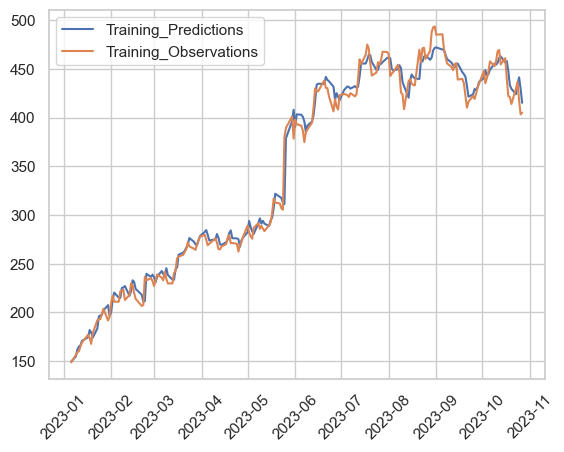

In [154]:
# You can plot the models predictions against the observations
# For the training data
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Training_Predictions','Training_Observations'])
plt.xticks(rotation=45)

1/1 [==============================] - 0s 65ms/step


(array([19659., 19662., 19666., 19670., 19674., 19678., 19682., 19686.,
        19690., 19692., 19696.]),
 [Text(19659.0, 0, '2023-10-29'),
  Text(19662.0, 0, '2023-11-01'),
  Text(19666.0, 0, '2023-11-05'),
  Text(19670.0, 0, '2023-11-09'),
  Text(19674.0, 0, '2023-11-13'),
  Text(19678.0, 0, '2023-11-17'),
  Text(19682.0, 0, '2023-11-21'),
  Text(19686.0, 0, '2023-11-25'),
  Text(19690.0, 0, '2023-11-29'),
  Text(19692.0, 0, '2023-12-01'),
  Text(19696.0, 0, '2023-12-05')])

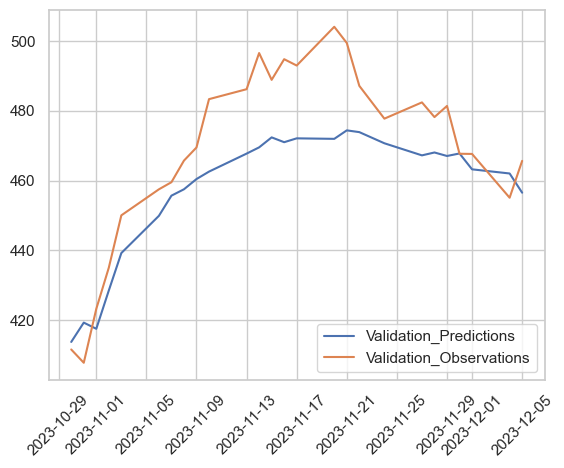

In [155]:
# For the validation data
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation_Predictions','Validation_Observations'])
plt.xticks(rotation=45)

The performance of the model is poor!!

1/1 [==============================] - 0s 66ms/step


(array([19696., 19700., 19704., 19708., 19712., 19716., 19720., 19723.,
        19727., 19731., 19735.]),
 [Text(19696.0, 0, '2023-12-05'),
  Text(19700.0, 0, '2023-12-09'),
  Text(19704.0, 0, '2023-12-13'),
  Text(19708.0, 0, '2023-12-17'),
  Text(19712.0, 0, '2023-12-21'),
  Text(19716.0, 0, '2023-12-25'),
  Text(19720.0, 0, '2023-12-29'),
  Text(19723.0, 0, '2024-01-01'),
  Text(19727.0, 0, '2024-01-05'),
  Text(19731.0, 0, '2024-01-09'),
  Text(19735.0, 0, '2024-01-13')])

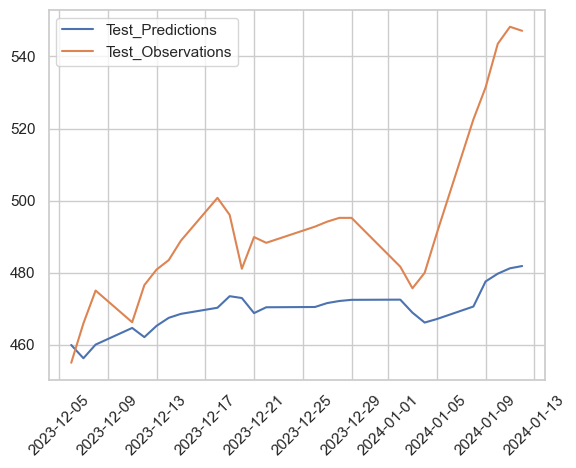

In [156]:
# For the test data
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Test_Predictions','Test_Observations'])
plt.xticks(rotation=45)

It's even worse against the test data

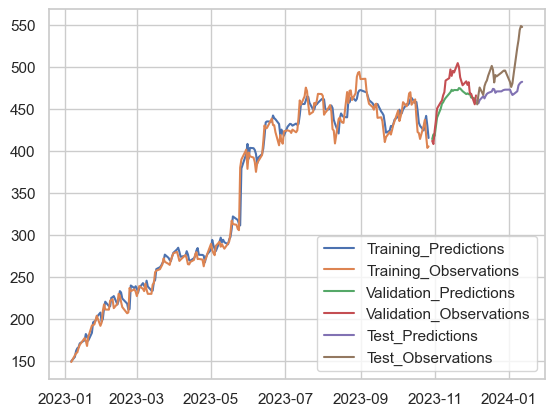

In [157]:
# Lets plot everything together 
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Training_Predictions','Training_Observations', 
            'Validation_Predictions','Validation_Observations',
            'Test_Predictions','Test_Observations'])

In [187]:
recursive_predictions = []
last_window = deepcopy(X_train[-1])
next_prediction = model.predict(np.array([last_window])).flatten()
recursive_predictions.append(next_prediction)
last_window = np.vstack([last_window[1:], [next_prediction]])

1/1 [==============================] - 0s 75ms/step


In [186]:
last_window

array([[436.63],
       [417.79],
       [403.26]], dtype=float32)

In [188]:
last_window

array([[417.79   ],
       [403.26   ],
       [415.05554]], dtype=float32)

In [191]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.vstack([last_window[1:], [next_prediction]])

1/1 [==============================] - 0s 69ms/step


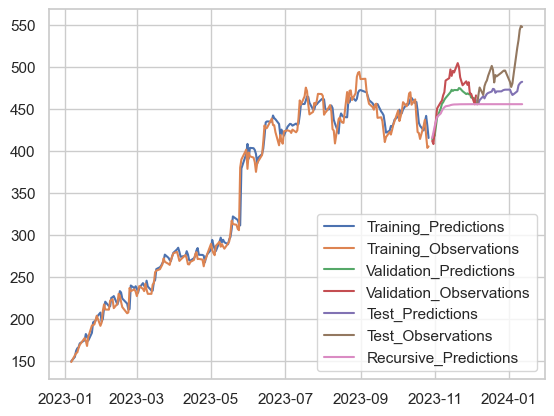

In [192]:
# Lets plot everything together 
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.plot(recursive_dates, recursive_predictions)


plt.legend(['Training_Predictions','Training_Observations', 
            'Validation_Predictions','Validation_Observations',
            'Test_Predictions','Test_Observations', 
           'Recursive_Predictions'])

# 8. Evaluation

- The model is very poor at predicting the future, clearly a model of this kind is not effective in predicting the future price of a stock
- But I'm not massively suprised, stock price prediction is extremely difficult
- Using machine learning in this way was never going to be a silver bullet solution
- For this reason, I will be be able to use the model to try and profit from my analysis